In [1]:
import warnings
#warnings.filterwarnings('ignore')
import sys
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
sys.path.append('C:\\Users\\elisa\\Documents\\git\\mplstereonet')
sys.path.append('C:\\Users\\elisa\\Documents\\git\\gempy')
import mplstereonet
import gempy as gp
#from importlib import reload
import os
#sys.path.append('C:\\Users\\elisa\\Documents\\git\\remote-geomod') 
import pandas as pn

#import rgeomod

import gdal
import skimage
import scipy
import linecache
from mpl_toolkits.mplot3d import Axes3D
from copy import copy

import seaborn as sns

C:\Users\elisa\Documents\git\gempy\gempy\plotting\visualization.py:36: UserWarning: Steno 3D package is not installed. No 3D online visualization available.
  warnings.warn('Steno 3D package is not installed. No 3D online visualization available.')
C:\Users\elisa\Documents\git\gempy\gempy\data_management.py:34: UserWarning: qgrid package is not installed. No interactive dataframes available.
  warnings.warn('qgrid package is not installed. No interactive dataframes available.')


In [2]:
path_interf = "C:\\Users\\elisa\\Documents\\git\\elthesis\\notebooks\\final\\data\\all_points.csv"
path_orient = "C:\\Users\\elisa\\Documents\\git\\elthesis\\notebooks\\final\\data\\all_foliations.csv"

In [3]:
resolution = [50,50,50]
extent = np.array([777000, 794500, 6345000, 6353000, -1500, 1000])

In [4]:
geo_data = gp.create_data(extent = extent, resolution = resolution,
                        path_i = path_interf,
                        path_o = path_orient)

C:\Users\elisa\Anaconda3\envs\rootclone\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [5]:
#sorting of lithologies
gp.set_series(geo_data,{'fault_NWSE':('fault_NWSE'),
                        'fault_NS':('fault_NS'),
                        'fault_NESW1':('fault_NESW1'),
                        'fault_NESW2':('fault_NESW2'),
                        'fault_NESW3':('fault_NESW3'),
                        'Trias_Series':('Liassic','Triassic'), 
                        'Carbon_Series':('Carboniferous'), 
                        'Basement_Series':('basement')},
             order_formations=['fault_NWSE','fault_NS',
                                'fault_NESW1','fault_NESW3','fault_NESW2',
                               'Liassic','Triassic','Carboniferous','basement'])

In [6]:
colordict = {'Liassic':'#015482', 'Triassic': '#9f0052', 'Carboniferous':'#ffbe00','basement':'#728f02',
            'fault_NWSE':'#2a2a2a','fault_NS':'#2a2a2a','fault_NESW2':'#939393','fault_NESW1':'#939393',
             'fault_NESW3':'#939393','fault_NESW4':'#939393' }
geo_data.set_colors(colordict)

,value,formation_number,color
fault_NWSE,1,1,#2a2a2a
fault_NS,2,2,#2a2a2a
fault_NESW1,3,3,#939393
fault_NESW3,4,4,#939393
fault_NESW2,5,5,#939393
Liassic,6,6,#015482
Triassic,7,7,#9f0052
Carboniferous,8,8,#ffbe00
basement,9,9,#728f02


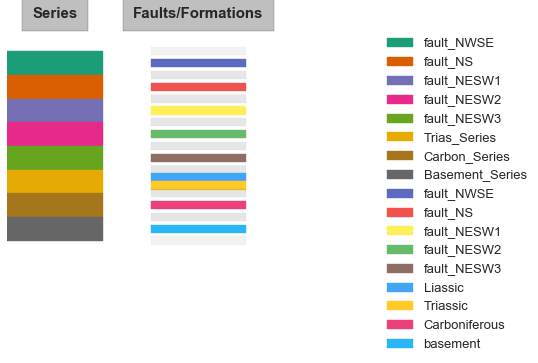

In [7]:
gp.get_sequential_pile(geo_data)

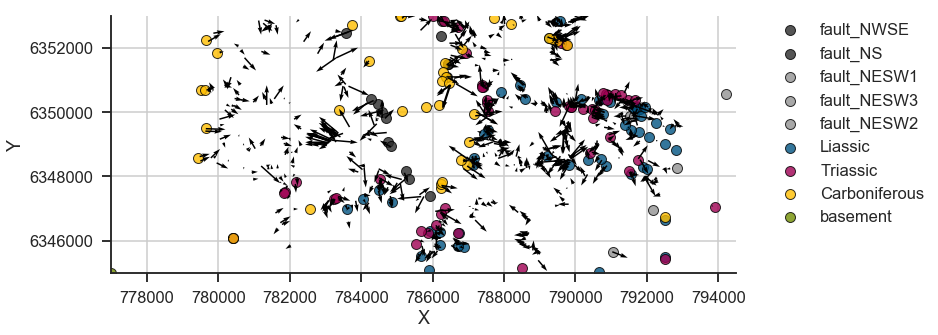

In [8]:
gp.plotting.plot_data(geo_data,direction='z')
plt.grid(True)
#plt.savefig("C:\\Users\\elisa\\Documents\\Masterarbeit\\Figures\\all_input.png", format='png', dpi=1000)

In [9]:
#Compiling of interpolator function
interp_data = gp.InterpolatorData(geo_data, compile_theano=True,
                                  dtype='float64',theano_optimizer='fast_compile')#, verbose=[])

Compiling theano function...
Compilation Done!
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  5


In [10]:
faults1=['fault_NESW1',
 'fault_NESW2',
 'fault_NESW3']
faults2=['fault_NS',
 'fault_NWSE']

In [11]:
geo_data.faults_relations.loc[faults1,['Trias_Series']] = True
geo_data.faults_relations.loc[faults2,['Trias_Series']] = True
geo_data.faults_relations.loc[faults2,['Carbon_Series']] = True
geo_data.faults_relations

,fault_NWSE,fault_NS,fault_NESW1,fault_NESW2,fault_NESW3,Trias_Series,Carbon_Series,Basement_Series
fault_NWSE,False,False,False,False,False,True,True,False
fault_NS,False,False,False,False,False,True,True,False
fault_NESW1,False,False,False,False,False,True,False,False
fault_NESW2,False,False,False,False,False,True,False,False
fault_NESW3,False,False,False,False,False,True,False,False
Trias_Series,False,False,False,False,False,False,False,False
Carbon_Series,False,False,False,False,False,False,False,False
Basement_Series,False,False,False,False,False,False,False,False


In [12]:
interp_data.update_interpolator(geo_data)

In [13]:
interp_data.

AttributeError: 'InterpolatorData' object has no attribute 'potential_at_interfaces'

In [25]:
lith_block, fault_block = gp.compute_model(interp_data)

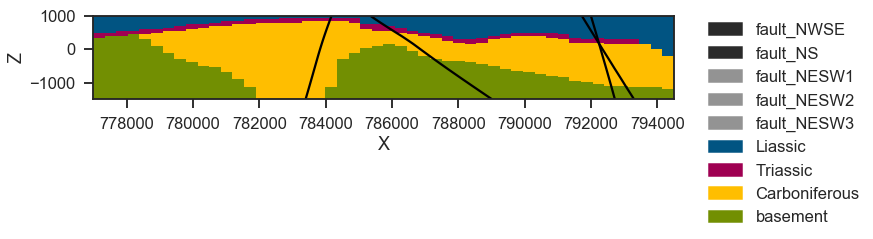

In [26]:
gp.plot_section(geo_data, lith_block[0], cell_number=25,  direction='y', plot_data=False)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=38,  direction='y')

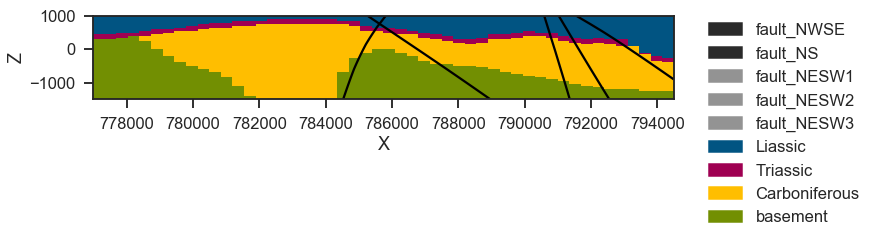

In [20]:
gp.plot_section(geo_data, lith_block[0], cell_number=25,  direction='y', plot_data=False)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=18,  direction='y')

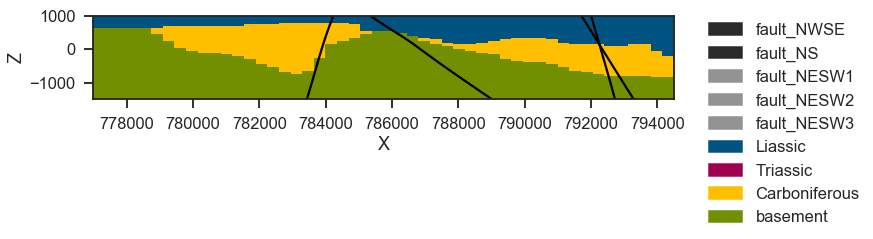

In [26]:
gp.plot_section(geo_data, lith_block[0], cell_number=25,  direction='y', plot_data=False)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=38,  direction='y')

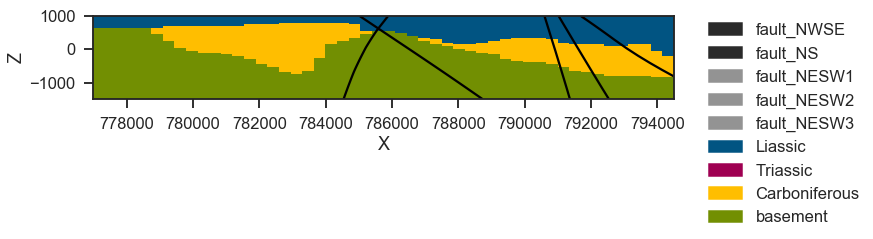

In [27]:
gp.plot_section(geo_data, lith_block[0], cell_number=25,  direction='y', plot_data=False)
gp.plotting.extract_countours(geo_data, interp_data, fb=fault_block, cell_number=18,  direction='y')

..\\..\\..\\gempy\gempy\gempy_front.py:955: FutureWarning: gempy plotting functionality will be moved in version 1.2, use gempy.plotting module instead
  "use gempy.plotting module instead", FutureWarning)


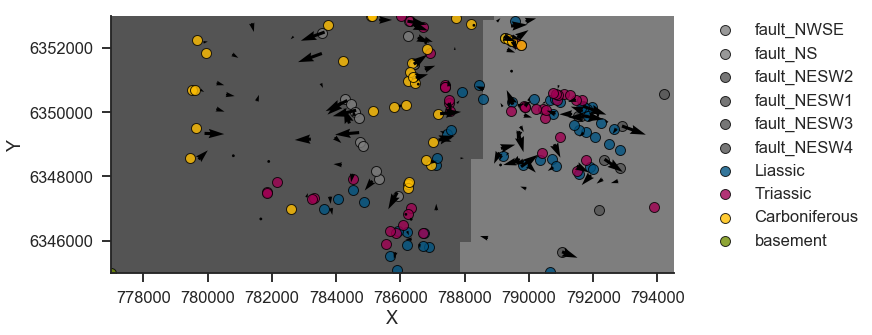

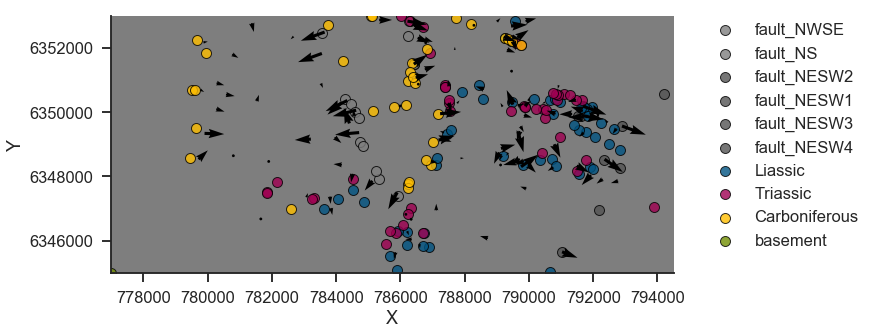

In [46]:
#faults
gp.plot_section(geo_data, fault_block[2], cell_number=5,  direction='z', plot_data=True)
gp.plot_section(geo_data, fault_block[0], cell_number=5,  direction='z', plot_data=True)

In [18]:
ver , sim = gp.get_surfaces(interp_data,lith_block[1],(fault_block[1], fault_block[3], fault_block[5], fault_block[7],fault_block[9]))

In [19]:
gp.plotting.plot_surfaces_3D(geo_data, ver, sim, plot_data=False)

closing vtk
